In [1]:
import numpy as np
import pandas as pd
from plotly import tools as toolsly
#import plotly.plotly as py
#from plotly.plotly import plot
from plotly.offline import plot
import plotly.graph_objs as go
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.xkcd()

In [84]:
legs = np.array([3.8, 4.8, 6.7])
print('short', legs)
legs_full  = np.tile(legs,8)
legs_ultra = legs_full[:12]+legs_full[1:13]
legs_full  = np.insert(legs_full, 0, 0.)
legs_ultra = np.insert(legs_ultra, 0, 0.)
print('full ', legs_full, legs_full.size, legs_full.sum())
print('ultra', legs_ultra, legs_ultra.size, legs_ultra.sum())

runner = np.array([1,2,3,4])
runner = np.repeat(runner,2)
runner = np.tile(runner,3)
runner = np.append(runner, 0)
print('runner', runner, runner.size)

short [ 3.8  4.8  6.7]
full  [ 0.   3.8  4.8  6.7  3.8  4.8  6.7  3.8  4.8  6.7  3.8  4.8  6.7  3.8  4.8
  6.7  3.8  4.8  6.7  3.8  4.8  6.7  3.8  4.8  6.7] 25 122.4
ultra [  0.    8.6  11.5  10.5   8.6  11.5  10.5   8.6  11.5  10.5   8.6  11.5
  10.5] 13 122.4
runner [1 1 2 2 3 3 4 4 1 1 2 2 3 3 4 4 1 1 2 2 3 3 4 4 0] 25


In [86]:
race = pd.DataFrame({'leg':np.arange(25),
                     'distance':legs_full,
                     'runner': runner,
                  })
race['distance_accum'] = np.add.accumulate(race['distance'])

race

,distance,leg,runner,distance_accum
0,0.0,0,1,0.0
1,3.8,1,1,3.8
2,4.8,2,2,8.6
3,6.7,3,2,15.3
4,3.8,4,3,19.1
5,4.8,5,3,23.9
6,6.7,6,4,30.6
7,3.8,7,4,34.4
8,4.8,8,1,39.2
9,6.7,9,1,45.9


In [116]:
runners = pd.DataFrame({'runner':np.arange(5),
                        'name':['NA', 'Dan', 'Josh', 'Pete', 'Ross'],
                        'pace':[np.timedelta64(int(0), 's'),
                                np.timedelta64(int(10*60), 's'),
                                np.timedelta64(int(10*60), 's'),
                                np.timedelta64(int(10*60), 's'),
                                np.timedelta64(int(10*60), 's')]})
runners = runners.set_index('runner') # must be a better way
runners

,name,pace
runner,,
0,NA,00:00:00
1,Dan,00:10:00
2,Josh,00:10:00
3,Pete,00:10:00
4,Ross,00:10:00


In [123]:
leg_time = []
for index, row in race.iterrows():
    leg_time.append(row.distance*runners.loc[row.runner].pace)
race['time'] = leg_time
race['time_accum'] = np.add.accumulate(race['time']) 
race

,distance,leg,runner,distance_accum,time_leg,time,time_accum
0,0.0,0,1,0.0,00:00:00,00:00:00,00:00:00
1,3.8,1,1,3.8,00:38:00,00:38:00,00:38:00
2,4.8,2,2,8.6,00:48:00,00:48:00,01:26:00
3,6.7,3,2,15.3,01:07:00,01:07:00,02:33:00
4,3.8,4,3,19.1,00:38:00,00:38:00,03:11:00
5,4.8,5,3,23.9,00:48:00,00:48:00,03:59:00
6,6.7,6,4,30.6,01:07:00,01:07:00,05:06:00
7,3.8,7,4,34.4,00:38:00,00:38:00,05:44:00
8,4.8,8,1,39.2,00:48:00,00:48:00,06:32:00
9,6.7,9,1,45.9,01:07:00,01:07:00,07:39:00


<IPython.core.display.Javascript object>


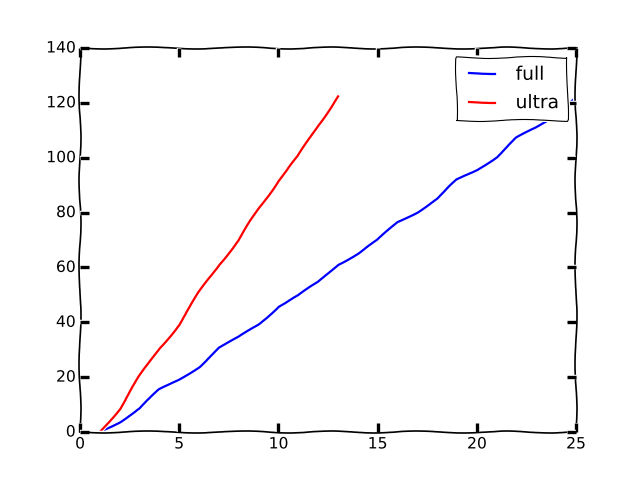

In [3]:
fig, axes  = plt.subplots()
axes.plot(np.arange(legs_full.size)+1, np.add.accumulate(legs_full), label='full')
axes.plot(np.arange(legs_ultra.size)+1, np.add.accumulate(legs_ultra), label='ultra')
axes.legend()

In [7]:
time_ultra = legs_ultra * np.timedelta64(int(10*60), 's')
print(time_ultra)
time_start = np.datetime64('2017-04-21T12:00')
print(np.add.accumulate(time_ultra)+time_start)

[   0 5160 6900 6300 5160 6900 6300 5160 6900 6300 5160 6900 6300]
['2017-04-21T12:00:00' '2017-04-21T13:26:00' '2017-04-21T15:21:00'
 '2017-04-21T17:06:00' '2017-04-21T18:32:00' '2017-04-21T20:27:00'
 '2017-04-21T22:12:00' '2017-04-21T23:38:00' '2017-04-22T01:33:00'
 '2017-04-22T03:18:00' '2017-04-22T04:44:00' '2017-04-22T06:39:00'
 '2017-04-22T08:24:00']


In [10]:
fig = toolsly.make_subplots()
data = go.Scatter(x=np.add.accumulate(legs_ultra), y=np.add.accumulate(time_ultra)+time_start, name='ultra')
fig.append_trace(data, 1, 1)
plotly_args = {}
plot(fig, show_link=False, **plotly_args)

This is the format of your plot grid:
[ (1,1) x1,y1 ]



'file:///home/pf9/code/musings/temp-plot.html'